In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [2]:
train=pd.read_csv(r"C:\Users\HP\Downloads\SalaryData_Train.csv")
train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
test=pd.read_csv(r"C:\Users\HP\Downloads\SalaryData_Test.csv")
test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


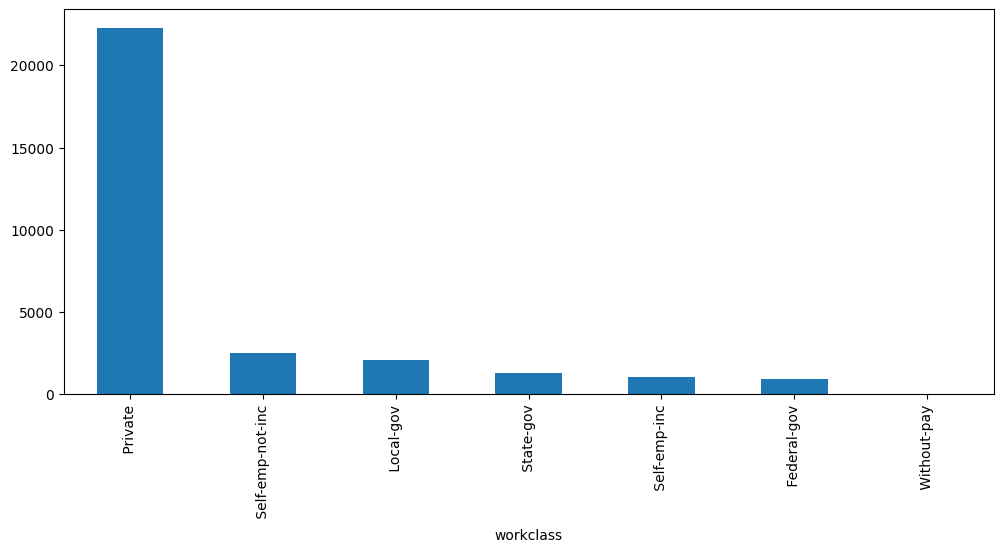

In [5]:
plt.figure(figsize=(12,5))
train.workclass.value_counts().plot.bar();

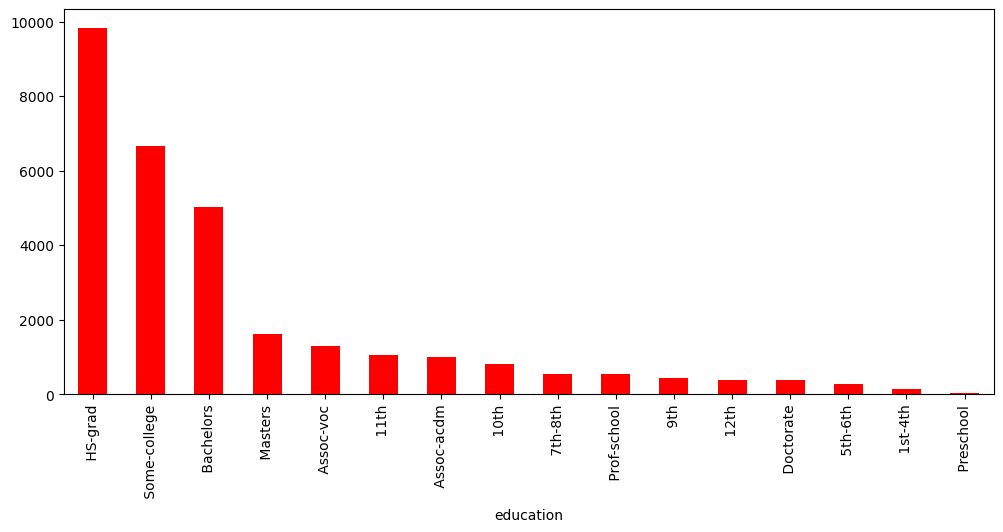

In [6]:
plt.figure(figsize=(12,5))
train.education.value_counts().plot.bar(color='red');

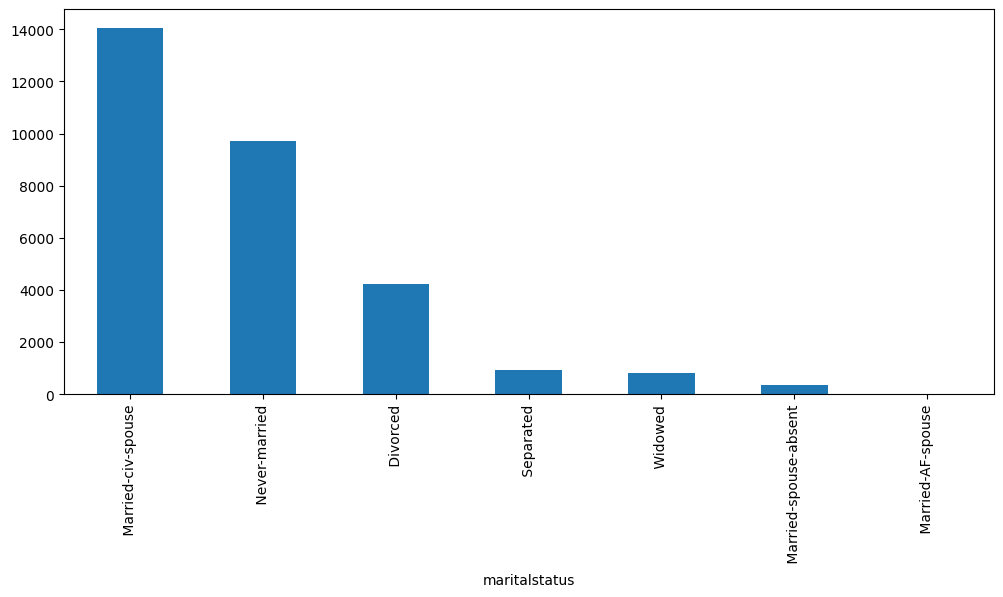

In [7]:
plt.figure(figsize=(12,5))
train.maritalstatus.value_counts().plot.bar();

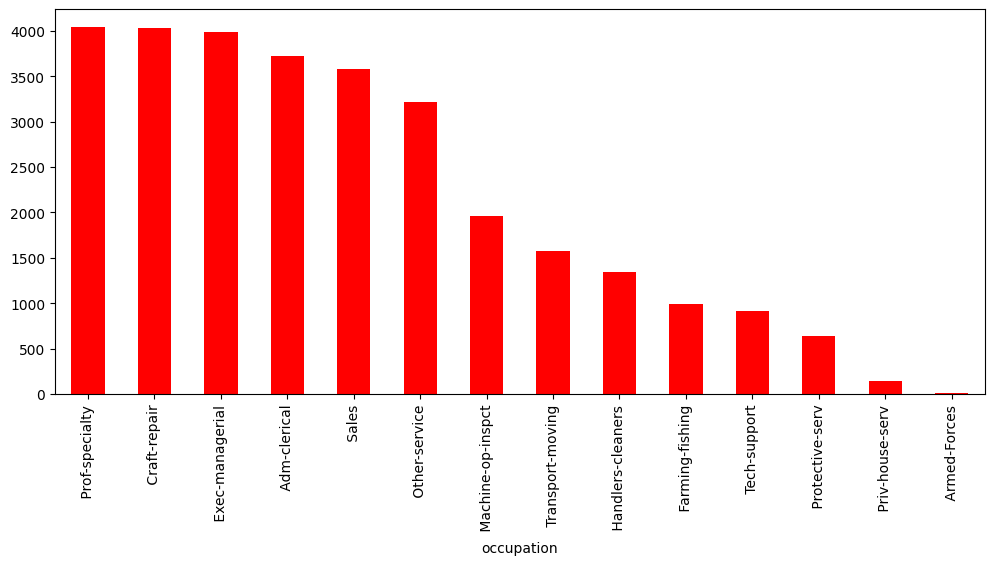

In [8]:
plt.figure(figsize=(12,5))
train.occupation.value_counts().plot.bar(color='red');

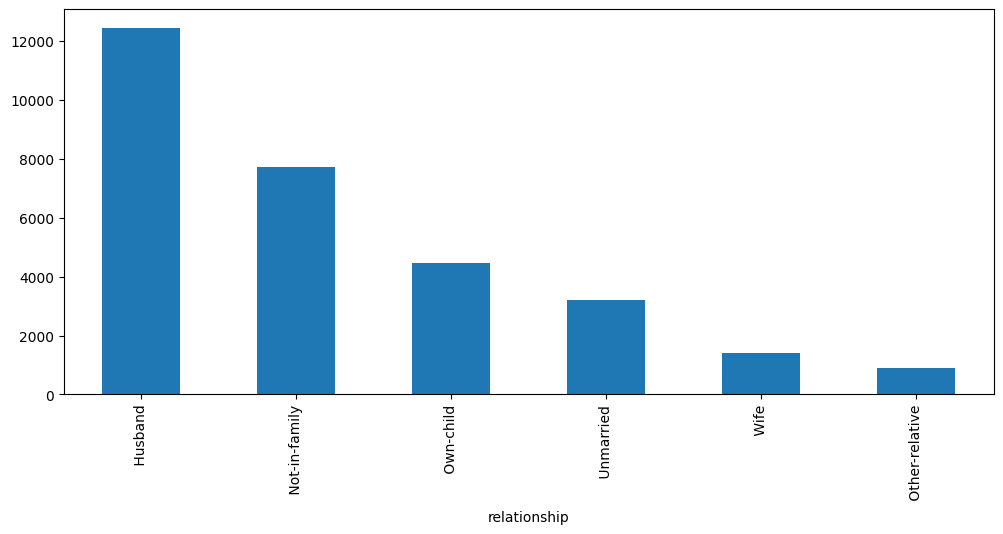

In [9]:
plt.figure(figsize=(12,5))
train.relationship.value_counts().plot.bar();

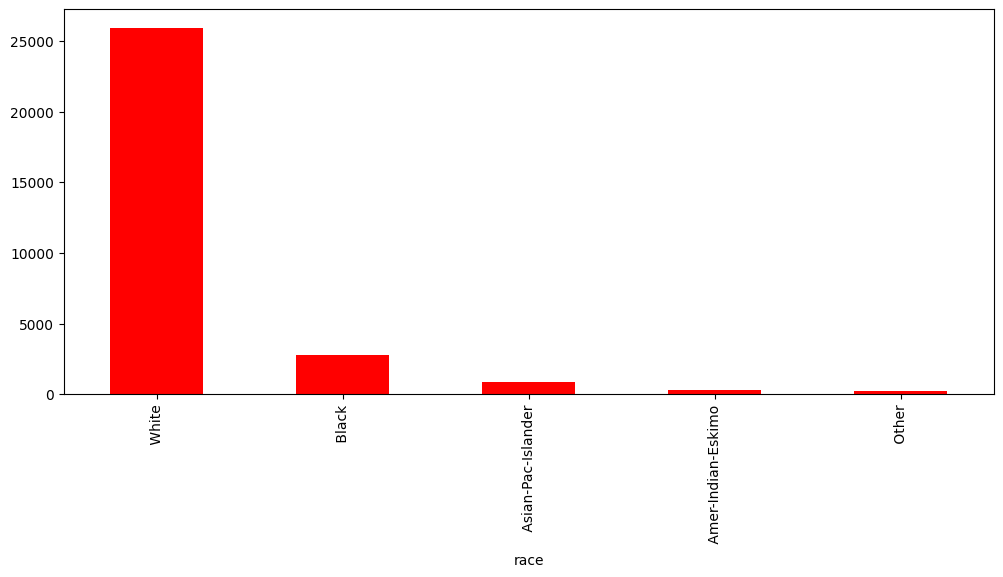

In [10]:
plt.figure(figsize=(12,5))
train.race.value_counts().plot.bar(color='red');

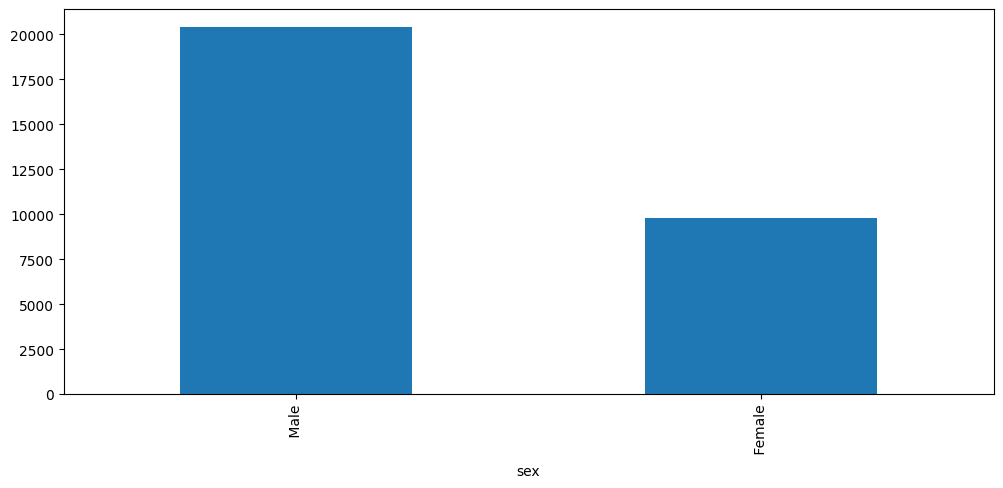

In [11]:
plt.figure(figsize=(12,5))
train.sex.value_counts().plot.bar();

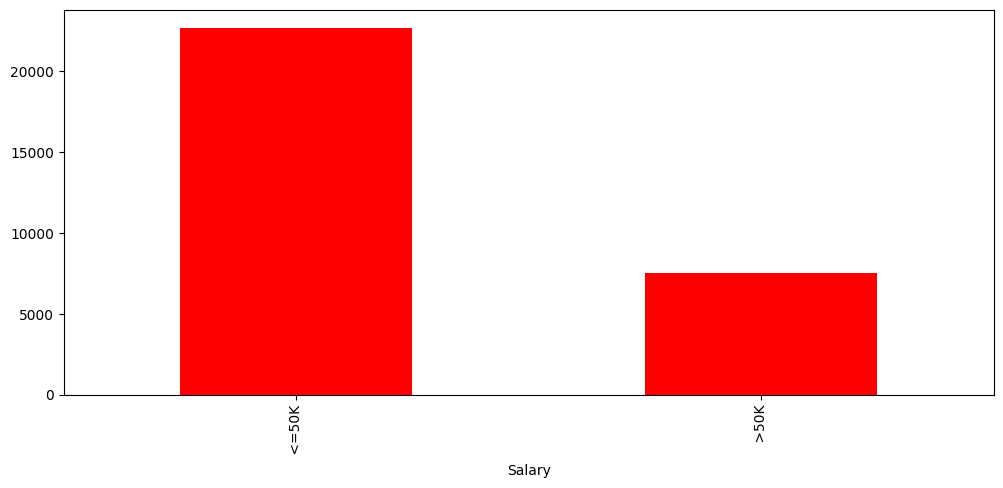

In [12]:
plt.figure(figsize=(12,5))
train.Salary.value_counts().plot.bar(color='red');

In [13]:
train1 = train.iloc[:,0:13]

train1 = pd.get_dummies(train1)
train1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,39,13,2174,0,40,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,50,13,0,0,13,False,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
2,38,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,53,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,28,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,12,0,0,38,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
30157,40,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
30158,58,9,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
30159,22,9,0,0,20,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
test1 = test.iloc[:,0:13]

test1 = pd.get_dummies(test1)
test1

,age,educationno,capitalgain,capitalloss,hoursperweek,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native_ Portugal,native_ Puerto-Rico,native_ Scotland,native_ South,native_ Taiwan,native_ Thailand,native_ Trinadad&Tobago,native_ United-States,native_ Vietnam,native_ Yugoslavia
0,25,7,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,38,9,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
2,28,12,0,0,40,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,44,10,7688,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
4,34,6,0,0,30,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,13,0,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15056,39,13,0,0,36,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15057,38,13,0,0,50,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
15058,44,13,5455,0,40,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False


In [15]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(train1)
train_norm = sc.transform(train1)
train_norm         

array([[ 0.04277892,  1.12889813,  0.14608503, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 0.88026081,  1.12889813, -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-0.0333558 , -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       ...,
       [ 1.48933854, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [-1.25151126, -0.4397325 , -0.14744712, ...,  0.31081205,
        -0.04611353, -0.0230384 ],
       [ 1.03253024, -0.4397325 ,  1.88108414, ...,  0.31081205,
        -0.04611353, -0.0230384 ]])

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(test1)
test_norm = sc.transform(test1)
test_norm  

array([[-1.02900513, -1.2165628 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.05742253, -0.43489824, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.80479376,  0.73759862, -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       ...,
       [-0.05742253,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441],
       [ 0.39100021,  1.1284309 ,  0.562734  , ...,  0.30373366,
        -0.03554172, -0.02156441],
       [-0.2816339 ,  1.1284309 , -0.14543845, ...,  0.30373366,
        -0.03554172, -0.02156441]])

In [17]:
from sklearn.decomposition import PCA

train_pca = PCA(n_components = 102)
train_pca_values = train_pca.fit_transform(train_norm)
train_pca_values

array([[-5.50838008e-01, -2.38164986e+00, -5.91921169e-01, ...,
        -2.89196068e-15,  4.72924071e-16, -1.78853289e-15],
       [ 2.81915829e+00, -1.37085459e+00, -4.81126421e-02, ...,
         3.60357295e-15, -1.00103991e-15,  6.44676622e-15],
       [-7.93831525e-01,  8.71803957e-01, -1.20213150e+00, ...,
         6.86193333e-16,  2.20252032e-16, -6.10055754e-18],
       ...,
       [-2.37835145e+00, -7.98690413e-01,  3.39105780e-01, ...,
        -1.14323330e-16, -4.65225394e-17, -7.54723889e-17],
       [-1.97547719e+00,  1.19305162e+00, -1.82899406e+00, ...,
         5.28289339e-17,  6.12382968e-18,  1.01890702e-16],
       [ 7.62131786e-01, -1.77200870e+00,  5.36971989e-01, ...,
        -2.83153325e-17,  1.89111278e-17,  2.52315590e-17]])

In [18]:
from sklearn.decomposition import PCA

test_pca = PCA(n_components = 102)
test_pca_values = test_pca.fit_transform(test_norm)
test_pca_values

array([[-2.24293780e+00,  2.60318091e+00, -3.27616503e-01, ...,
         7.50259733e-16,  9.50612268e-16, -1.08484709e-15],
       [ 2.22690391e+00,  1.59471521e+00, -7.32082794e-01, ...,
         7.10982097e-16,  8.60903575e-16,  9.53347928e-16],
       [ 2.30704416e+00, -1.16883181e+00, -2.00521481e-01, ...,
        -2.86289446e-16, -2.20178142e-16,  2.73092004e-16],
       ...,
       [ 2.39583218e+00, -1.46859740e+00, -2.09424792e-01, ...,
         5.88065144e-17, -5.59984797e-17, -3.96504532e-18],
       [-1.14039506e+00, -1.03678137e+00,  2.58079490e+00, ...,
        -3.02092935e-16,  3.76940089e-17, -1.87695028e-17],
       [ 3.38445120e+00, -1.95481575e+00, -1.72791531e-01, ...,
        -1.15712679e-17,  7.15068986e-17,  1.48442447e-17]])

In [19]:
var = train_pca.explained_variance_ratio_
var

array([4.47952203e-02, 3.03018755e-02, 2.56772664e-02, 2.30740938e-02,
       1.90544461e-02, 1.75159608e-02, 1.66112958e-02, 1.51765356e-02,
       1.40918479e-02, 1.37139289e-02, 1.30161578e-02, 1.27145892e-02,
       1.22845420e-02, 1.20633855e-02, 1.19277829e-02, 1.17776199e-02,
       1.15732784e-02, 1.14595050e-02, 1.12290572e-02, 1.10955712e-02,
       1.09763472e-02, 1.09664173e-02, 1.08013630e-02, 1.07163253e-02,
       1.06965233e-02, 1.06243926e-02, 1.05150466e-02, 1.04401201e-02,
       1.04195534e-02, 1.03772631e-02, 1.02585913e-02, 1.02518285e-02,
       1.02343018e-02, 1.02011311e-02, 1.01746044e-02, 1.00893885e-02,
       1.00693090e-02, 1.00007488e-02, 9.97967518e-03, 9.93621541e-03,
       9.91132587e-03, 9.87257873e-03, 9.85864172e-03, 9.85346688e-03,
       9.83507641e-03, 9.82654639e-03, 9.82141035e-03, 9.81950938e-03,
       9.81361594e-03, 9.80760489e-03, 9.80531422e-03, 9.80056163e-03,
       9.79178710e-03, 9.77352236e-03, 9.77198782e-03, 9.75826765e-03,
      

In [20]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([  4.48,   7.51,  10.08,  12.39,  14.3 ,  16.05,  17.71,  19.23,
        20.64,  22.01,  23.31,  24.58,  25.81,  27.02,  28.21,  29.39,
        30.55,  31.7 ,  32.82,  33.93,  35.03,  36.13,  37.21,  38.28,
        39.35,  40.41,  41.46,  42.5 ,  43.54,  44.58,  45.61,  46.64,
        47.66,  48.68,  49.7 ,  50.71,  51.72,  52.72,  53.72,  54.71,
        55.7 ,  56.69,  57.68,  58.67,  59.65,  60.63,  61.61,  62.59,
        63.57,  64.55,  65.53,  66.51,  67.49,  68.47,  69.45,  70.43,
        71.4 ,  72.37,  73.34,  74.31,  75.28,  76.24,  77.2 ,  78.16,
        79.12,  80.07,  81.01,  81.95,  82.89,  83.82,  84.75,  85.66,
        86.57,  87.47,  88.36,  89.24,  90.11,  90.97,  91.82,  92.66,
        93.49,  94.28,  95.05,  95.77,  96.49,  97.14,  97.75,  98.35,
        98.88,  99.36,  99.79, 100.03, 100.05, 100.05, 100.05, 100.05,
       100.05, 100.05, 100.05, 100.05, 100.05, 100.05])

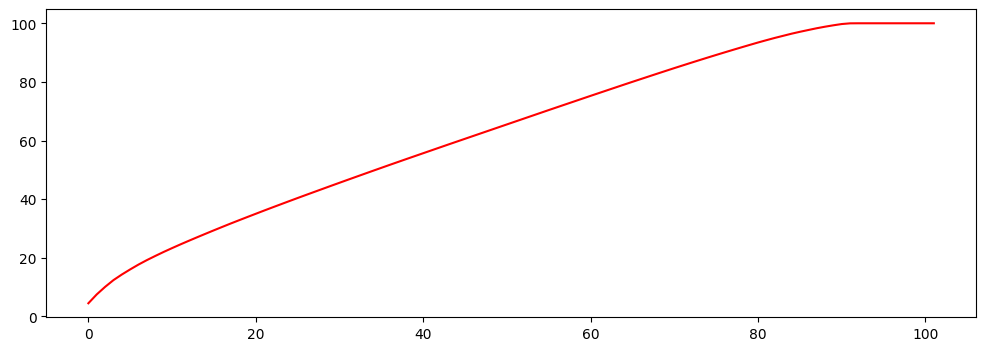

In [21]:
# Variance plot for PCA components obtained
plt.figure(figsize=(12,4))
plt.plot(var1,color="red");

In [22]:
finaltrain = pd.concat([pd.DataFrame(train_pca_values[:,0:90]),
                     train[['Salary']]], axis = 1)
finaltrain

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-0.550838,-2.381650,-0.591921,1.433211,0.340516,1.940931,-0.055056,0.515267,-0.603118,-1.349744,...,0.925827,0.366843,0.762292,0.955908,-0.431471,-0.253518,-0.090683,1.446239,0.537054,<=50K
1,2.819158,-1.370855,-0.048113,0.060772,0.148609,0.494097,0.971070,0.977166,-1.058340,1.543212,...,1.715245,-0.684681,0.173783,-1.120804,1.043838,-1.127099,0.538383,-0.179721,0.006457,<=50K
2,-0.793832,0.871804,-1.202131,-0.513685,0.452004,0.675599,-2.665003,0.041210,0.966047,-0.942719,...,0.666397,-0.126942,-0.368158,0.399572,0.094164,-0.001750,-0.622668,0.114582,0.079789,<=50K
3,0.732942,2.502494,0.763990,-0.149514,-3.056486,0.166519,0.140931,-2.430582,0.155941,1.066790,...,0.058897,0.409911,0.952768,0.193645,0.292208,0.033568,-0.226799,-0.779685,0.367130,<=50K
4,-1.070350,-1.638424,4.542395,0.260940,0.650488,-2.473710,2.483233,-2.795740,-0.249688,1.001833,...,-1.388747,0.857151,-1.132278,0.924125,0.087501,-0.409813,-0.711475,0.566080,-1.599465,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,-0.766825,-1.596732,-0.037113,-0.576608,0.331904,-3.490439,2.320920,-0.117277,-0.388185,-1.112954,...,-0.680328,0.177364,-0.265304,-0.170305,0.307492,-0.087299,-0.407937,1.072890,-0.389103,<=50K
30157,1.704432,1.785328,-0.594925,-0.692498,-0.411458,-1.251061,-0.505186,-0.513443,1.286209,-0.530841,...,0.603116,-0.279650,0.035936,0.532717,-0.070438,-0.160400,0.100112,-0.124855,0.253184,>50K
30158,-2.378351,-0.798690,0.339106,-4.067833,0.281604,-1.215646,-0.253538,1.090962,0.960431,0.065679,...,-1.205160,0.177494,0.668585,0.528450,0.580482,0.156868,-0.442096,0.753165,-0.657852,<=50K
30159,-1.975477,1.193052,-1.828994,1.598638,-0.633416,-0.187607,0.789310,0.860548,0.808205,-0.906124,...,1.329776,-0.312235,0.180269,-1.124998,0.500770,-0.047237,-0.227867,0.993340,-0.939524,<=50K


In [23]:
finaltest = pd.concat([pd.DataFrame(test_pca_values[:,0:90]),
                     test[['Salary']]], axis = 1)
finaltest

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,Salary
0,-2.242938,2.603181,-0.327617,2.062024,-3.245808,0.812560,-0.442784,-1.685650,0.924250,1.891991,...,0.322344,-0.266021,0.252272,-0.426056,0.051791,0.853665,-0.773508,0.466166,-0.064770,<=50K
1,2.226904,1.594715,-0.732083,-0.582928,0.054350,0.429844,-0.039662,1.000275,0.209847,0.679798,...,-1.039511,0.061724,-0.355513,1.642111,-1.653340,-0.382266,-0.152825,-0.393192,0.398895,<=50K
2,2.307044,-1.168832,-0.200521,0.097952,-1.635067,2.571033,1.024094,-0.651146,-1.099703,-3.652572,...,-0.314783,0.077195,-0.472801,0.653684,1.100821,-0.205823,0.020513,-0.194492,0.308206,>50K
3,1.080755,1.260533,0.937857,-0.024262,-3.174398,-0.970844,-0.340336,-1.973938,-0.711191,1.075373,...,0.651033,0.491425,0.776518,0.289192,0.192050,-0.267516,-0.415089,-0.484431,0.364319,>50K
4,-1.759546,1.778058,-1.256430,0.402017,0.646302,1.112461,-0.656860,0.304387,1.071483,0.751177,...,-0.341200,0.427165,0.069133,-0.864467,0.492786,-0.925634,0.280922,0.994358,-0.493925,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,-0.603437,-1.380653,-1.217944,3.023232,0.463631,0.320846,0.117746,-0.907320,1.101617,0.372391,...,-0.188856,0.102889,0.003352,0.969400,0.325052,1.506765,-0.047672,0.319851,-1.221906,<=50K
15056,-1.670443,-3.020764,0.059822,-0.326201,1.744026,-0.876546,-1.136618,-0.761872,0.720123,-0.079865,...,-0.158983,0.387623,-0.149291,0.919562,0.137806,0.821065,-0.053937,-1.401547,-0.662635,<=50K
15057,2.395832,-1.468597,-0.209425,1.122402,0.364606,-0.944486,0.190120,-1.382649,0.773748,0.171544,...,-0.488672,-0.211695,0.427440,0.216012,0.330597,0.638795,0.215296,-0.532991,-1.089635,<=50K
15058,-1.140395,-1.036781,2.580795,2.251643,-1.495169,-1.684794,-0.913144,2.031935,-0.905050,-0.245674,...,1.018273,2.174690,-0.425788,0.167408,0.560413,2.514837,-0.992345,1.516196,-0.091726,<=50K


In [24]:
array = finaltrain.values
X = array[0:1000,0:90]
Y = array[0:1000,90]

# SVM Classification

In [25]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [26]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.5,0.1],'C':[1,10,100] },
             {'kernel':['linear'],'C':[1,10,100]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'kernel': 'linear'}, 0.8220000000000001)

In [27]:
x = finaltest.values[0:1000,0:90]
y = finaltest.values[0:1000,90] 

In [28]:
clf = SVC(C=10, kernel='linear')
clf.fit(x,y)
results = clf.score(x,y)
print(np.round(results, 4))

0.846


# Bagging

In [29]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.999


# Random Forest

In [30]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.999


# Boosting

In [31]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 100
seed=7

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(x,y)
results = model.score(x,y)
print(np.round(results, 4))

0.942


# Stacking

In [32]:
# Stacking Ensemble for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [33]:
#create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x,y)
results = ensemble.score(x,y)
print(np.round(results, 4))

0.886


In [34]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('Boosting', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(x,y)
results = ensemble.score(x,y)
print(np.round(results, 4))

0.952


In [35]:
# Hence, we can say that Bagging/Random Forest- any of them is equally best predicting model for this dataset